In [1]:
%matplotlib inline

# Directions:
1.   Compute the mixed-layer depth from each one of your profiles [ Only need about a year -- to observe seasonal variability]. You need to identify a metric of your choice [temperature -- uniform within mixed layer due to mixing -- then drops] to identify the mixed layer, that you think makes sense for your data, and explain how you chose it. You may want to check its applicability for a number of profiles. In the presentation you will need to convince your peers that your mixed layer was defined appropriately.
2.   Calculate the integrated heat content (Q, in Joules/m2) of your profiles from the surface to a fixed depth. This depth should be equal to or greater than the maximum mixed layer depth estimated during your data-period. 
3.   Calculate the vertically averaged absolute salinity for the same depth as in 2) and plot how it varies in time.
4.   Using your plots of mixed-layer depth, Q, vertically averaged salinity, describe the seasonal variation in these properties from your float data. 
5.   Show one cool or unexpected thing you found in the data. Your choice. 


Mixed layers caused by mixing. In winter, storms prevalent which cause mixing within the first 1000m. (uniform temperature/salinity)
The Labrador Sea is a cold and salinity minimum region, (freshwater) relative to surrounding bodies, is it a better idea to look at salinity or temperature for mixed layer?


In [219]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import cartopy.crs as ccrs
from datetime import datetime
import gsw
import math
#nice stuff
import cartopy.feature as cfeature

In [3]:
data = loadmat('/Users/tyler/Desktop/SIO176/HW7/float5903390.mat')

In [4]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'date', 'latitude', 'longitude', 'pressure', 'salinity', 'temperature'])

In [5]:
temp = data['temperature']
pracsal = data['salinity']
pres = data['pressure']
long = np.transpose(data['longitude'])
lat = np.transpose(data['latitude'])
date = data['date']

In [84]:
SA = gsw.SA_from_SP(pracsal,pres,long,lat)
PT = gsw.pt_from_t(SA,temp,pres,p_ref=0)
CT = gsw.CT_from_pt(SA,PT)
rho = gsw.rho(SA,CT,pres)

# 1. Compute the mixed layer depth for ~ 1 year of data to analyze season variability of the mixed layer

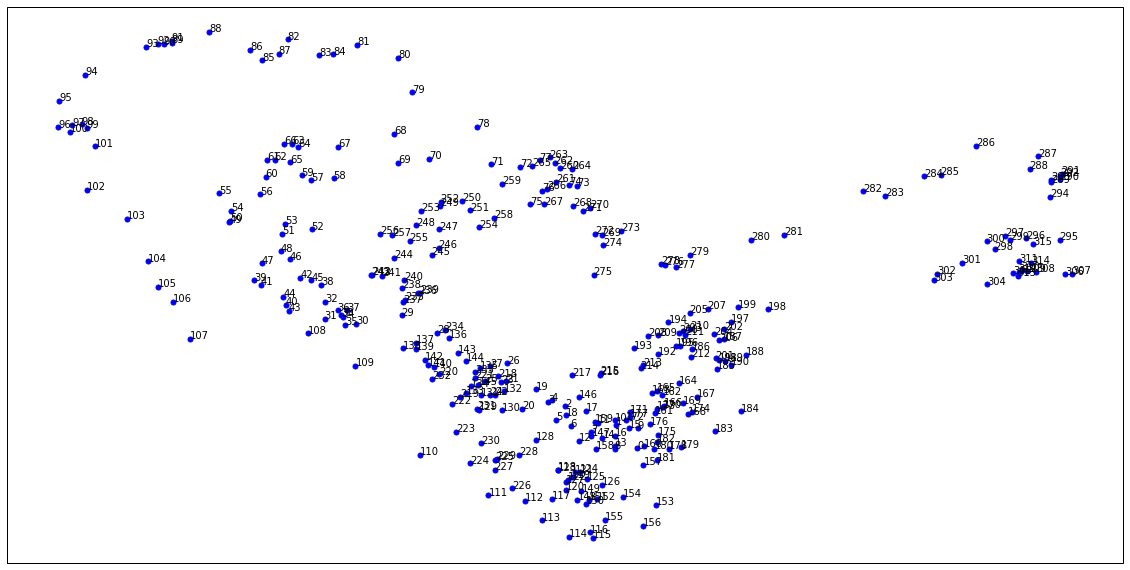

In [317]:
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection=ccrs.PlateCarree())
for i in range(0,len(lat)):
    plt.plot(long[i],lat[i],marker='o',c='blue',markersize=5)
    plt.text(long[i],lat[i],i,fontsize=10)

In [318]:
# choose boundary region and isolate profiles in that region
# upper lat bound
print(lat[199])
# lower lat bound
print(lat[115])
# left long bound
print(long[138])
# right long bound
print(long[198])

[56.378]
[50.971]
[-51.543]
[-42.973]


# Plot the trajectory to see where profiles are located

profile #: 0 date 03/10/2012
profile #: 1 date 03/20/2012
profile #: 2 date 03/31/2012
profile #: 3 date 04/10/2012
profile #: 4 date 04/20/2012
profile #: 5 date 04/30/2012
profile #: 6 date 05/10/2012
profile #: 7 date 05/20/2012
profile #: 8 date 05/31/2012
profile #: 9 date 06/10/2012
profile #: 10 date 06/20/2012
profile #: 11 date 06/30/2012
profile #: 12 date 07/10/2012
profile #: 13 date 07/20/2012
profile #: 14 date 07/31/2012
profile #: 15 date 08/10/2012
profile #: 16 date 08/20/2012
profile #: 17 date 08/30/2012
profile #: 18 date 09/09/2012
profile #: 19 date 09/19/2012
profile #: 20 date 09/30/2012
profile #: 21 date 10/10/2012
profile #: 22 date 10/20/2012
profile #: 23 date 10/30/2012
profile #: 24 date 11/09/2012
profile #: 25 date 11/19/2012
profile #: 26 date 11/30/2012
profile #: 27 date 12/10/2012
profile #: 28 date 12/20/2012
profile #: 110 date 04/03/2015
profile #: 111 date 04/13/2015
profile #: 112 date 04/23/2015
profile #: 113 date 05/03/2015
profile #: 114 d

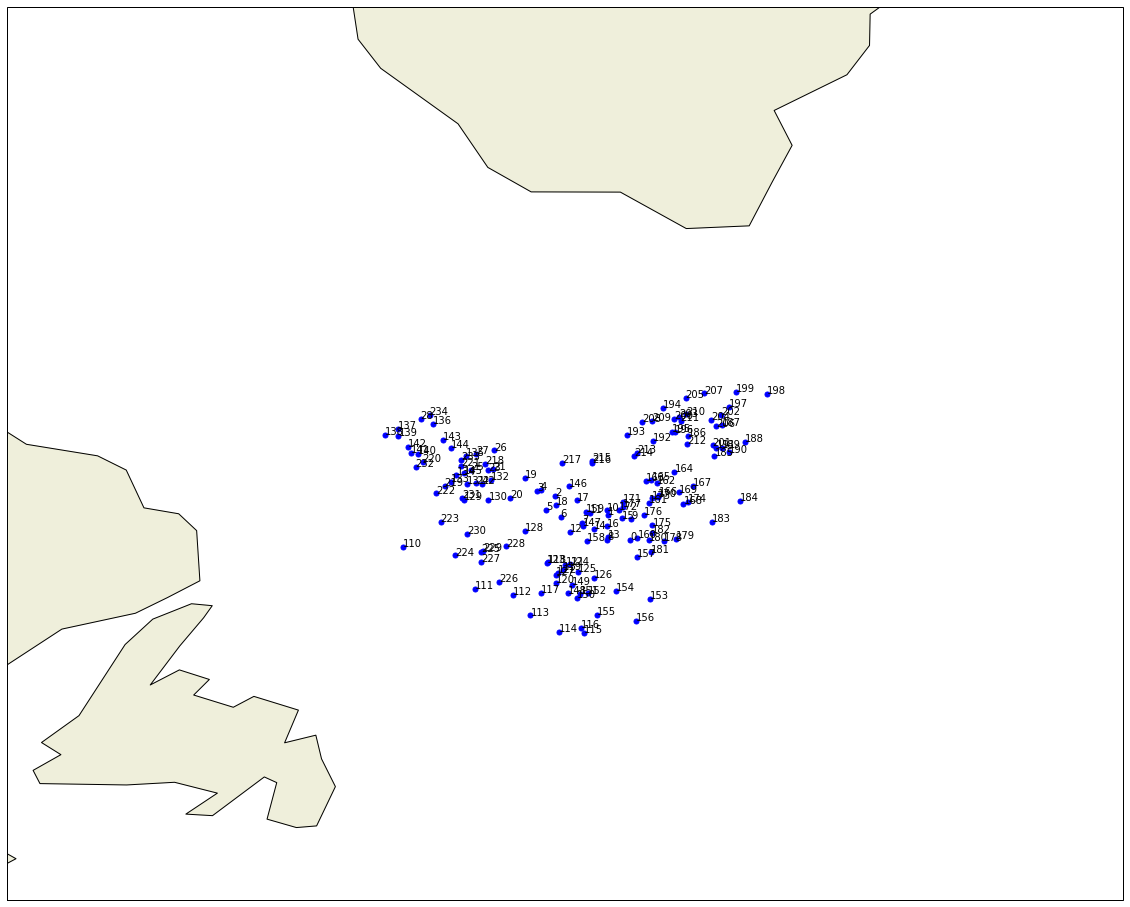

In [319]:
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection=ccrs.PlateCarree())
#ax.stock_img()
#ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)
ax.coastlines(color='black', linewidth=1)
#--------------------------------------------------------------------
# code to plot all profile positions
# i = range(0,len(lat))
# for i in range(0,len(i)):
#     plt.plot(long[i],lat[i],marker='o',c='blue',markersize=5)
#     plt.text(long[i],lat[i],i,fontsize=10)
#--------------------------------------------------------------------
# plotting positions of data within same region
prof_list = []
for i in range(0,len(lat)):
    if float(lat[i]) >= 50.971 and float(lat[i]) <= 56.378 and float(long[i]) >= -51.543 and float(long[i]) <= -42.973:
        plt.plot(long[i],lat[i],marker='o',c='blue',markersize=5)
        plt.text(long[i],lat[i],i,fontsize=10)
        prof_list=np.append(prof_list,i)
#--------------------------------------------------------------------
# gathering list of profile numbers in a list -- so we can plot these specific profiles 
prof_list = prof_list.tolist()
prof_list_ints = []
for j in range(0,len(prof_list)):
    b = int(prof_list[j])
    prof_list_ints.append(b)
#--------------------------------------------------------------------
# do these profiles span a year's time? -- we need annual seasonal cycle of profiles
# convert epoch times to dateobjects to datestrings
datestrs=[]
for i in range(0,len(date[0][:])):
    a = datetime.fromordinal(int(date[0][i])) # fromordinal takes the 6-digit float and converts from int to
    # date after epoch in a datetime object
    b = a.strftime('%m/%d/%Y') # convert datetime object to string
    datestrs = np.append(datestrs,b)
    
#--------------------------------------------------------------------
# print corresponding profiles in region with their dates to see what kind of mixed layer we should see 
for i in prof_list_ints:
    print('profile #:', i, 'date', datestrs[i])


ax.set_extent([-60,-35,45,65], crs=ccrs.PlateCarree())

[]

In [38]:
np.shape(datestrs)

(316,)

In [273]:
depth = gsw.z_from_p(pres,lat)

depth = -1*depth
depth1 = gsw.z_from_p(pres,lat)
depth1 = -1*depth1

In [68]:
prof_cool = [25,26,27,28,29,109,134,135,136,137,218,220,221]
prof_warm = [232,233,234]

In [320]:
mld = []
for i in range(0,len(temp[:])):
    for j in range(0,len(temp[0][:])-1):
        a = np.absolute(temp[i][j] - temp[i][j+1])
        if a >= 0.3:
            print(i,a,depth[i][j])

1 0.33465338 169.4090748820961
9 1.8131495 5.946596225259151
10 1.6477537 10.901784798991297
10 1.1115994 15.856949046667667
11 0.8757572 40.63115632447114
11 0.78894234 45.58562234967001
11 0.33316326 50.53996821212435
12 1.417242 40.632689185572104
12 1.2712259 45.58734212322466
13 0.88461494 30.72336300984531
13 0.87846804 35.678311216362026
13 0.73092794 40.63313921690251
13 0.6671128 45.58784703001647
14 0.3888607 5.946717105958129
14 0.47440243 35.677704469176994
14 0.8812504 40.632448208046
14 0.8537488 45.58707176162674
14 0.7666669 50.54157514846596
14 0.6932163 55.49595838710782
15 0.35084248 35.67696349412115
15 0.80842113 40.63160433049919
15 0.84197044 45.586124984200225
15 0.97616863 50.54052547377064
15 0.9786835 55.4948058177542
15 1.018085 60.44896603469195
15 0.8682585 65.40300614312237
16 1.3104162 30.72269648276422
16 1.2822399 35.67753719473844
16 1.1538839 40.632257703464596
16 1.1049366 45.586858027491964
16 0.7460003 50.54133818536723
16 0.670351 55.495698195634

203 0.80102015 80.24850925011987
203 0.6488571 85.20108804288469
204 0.52232933 90.15415085574314
204 0.4935131 95.10652286439472
204 0.31649494 100.05877491825342
205 0.36618996 100.05447330812405
205 0.33983755 105.00639253194244
206 0.3212123 100.05997133248144
224 0.81778836 20.813854772087986
224 0.8218558 25.769221736211435
224 0.8468423 30.724468452725212
224 0.6151848 35.679594940185
227 0.51731014 5.94710955144094
227 1.1632743 10.902901820434648
227 1.0352077 15.858573784499038
227 0.3143568 40.635129680523505
227 0.30282116 45.59008020476042
228 0.69727707 20.81347718832436
228 0.69727707 25.76875425748694
228 0.69727707 30.723911081321923
228 0.689373 35.678947678384645
228 0.65336514 40.63386406722781
228 0.61193514 45.588660266401476
229 0.5714607 15.858222216433546
229 1.6877356 20.813664034970927
229 1.5368104 25.76898558849327
229 0.609694 30.724186895558738
229 0.5782218 35.67926797472283
229 0.4348483 40.63422884453844
229 0.38447905 45.58906952355578
230 0.6999998 1

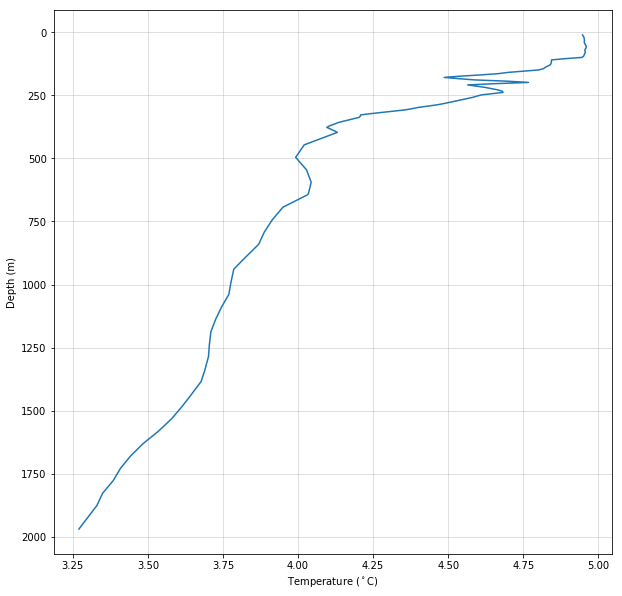

In [304]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()

plt.xlabel('Temperature ($^\circ$C)')
plt.ylabel('Depth (m)')
plt.grid(alpha=0.5)
plt.plot(temp[2],depth[0][:])
plt.gca().invert_yaxis()

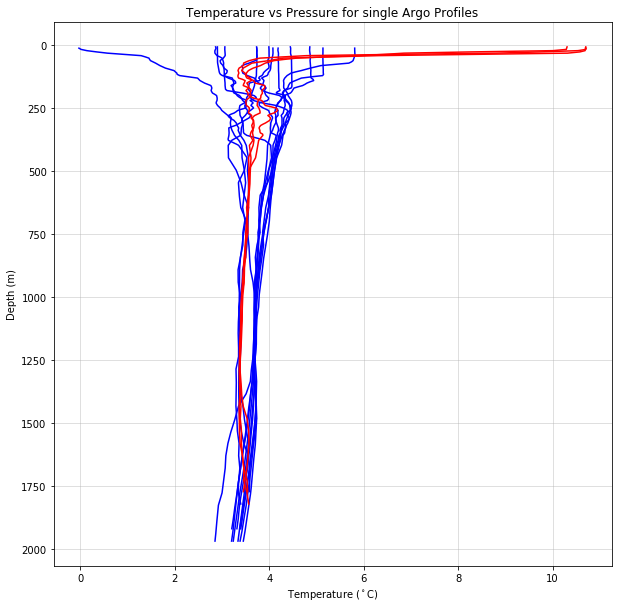

In [80]:
# plotting temperature profiles of profs in close proximity region
fig = plt.figure(figsize=(10,10))
ax = plt.axes()

plt.xlabel('Temperature ($^\circ$C)')
plt.ylabel('Depth (m)')
plt.grid(alpha=0.5)
plt.title('Temperature vs Pressure for single Argo Profiles')
# for i in prof_list_ints:
#     plt.plot(temp[i][:],depth[0][:])
for q in prof_cool:
    plt.plot(temp[q],depth[0][:],c='blue')
    
for w in prof_warm:
    plt.plot(temp[w],depth[0][:],c='red')
    
# plt.ylim([0, 1000])
plt.gca().invert_yaxis()



In [48]:
profs_cool

range(25, 29)

In [ ]:
print(lat[109],long[109])
print(lat[29]),long[29]
print(lat[19],long[19])
print(lat[223],long[223])
print(lat[234],long[234])
#long limits: 109 - 19, -52.654 to -48.405
#lat limits: 223 - 29, 54.457 to 56.194

# 2.   Calculate the integrated heat content (Q, in Joules/m2) of your profiles from the surface to a fixed depth. This depth should be equal to or greater than the maximum mixed layer depth estimated during your data-period. 

In [270]:
# Formula p*cp*T (int over depths)

# get average density over all data
# get rid of NaNs
rho_simp = rho[~np.isnan(rho)]
# average density
rho_avg = np.sum(rho_simp)/len(rho_simp)
print('Our average density is:', rho_avg, 'kg/m^3')

Our average density is: 1032.1078091523048 kg/m^3


In [109]:
np.shape(depth)

(316, 400)

In [110]:
np.shape(temp)

(316, 400)

In [112]:
len(temp[0][:])

400

In [118]:
clean_t = temp[~np.isnan(temp)]
clean_dep = depth[~np.isnan(depth)]

In [263]:
counter = 0
heat_profs=[]
for i in range(0,len(temp[:])): # 202 is where before 1000m
    for j in range(0,202):
        #calculate depth between two data points
        if np.isnan(temp[i][j]):
            pass
        else:
            dep_diff = np.absolute(depth[i][j] - depth[i][j+1])
        ##### calculate heat content for each profile
        
        heat = temp[i][j] * dep_diff
        heat_profs = np.append(heat_profs,heat)

In [283]:
for i in range(0,len(temp[:])):
    for j in range(0,len(temp[0][:])):
        if np.isnan(temp[i][j]):
            new_d = np.delete(depth1,depth1[i][j])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  after removing the cwd from sys.path.


In [272]:
for i in range(0,len(heat_profs)):
    if np.isnan(heat_profs[i]):
        print(i,'nan value here')

0 nan value here
202 nan value here
404 nan value here
405 nan value here
606 nan value here
808 nan value here
809 nan value here
1010 nan value here
1011 nan value here
1212 nan value here
1414 nan value here
1616 nan value here
1617 nan value here
1818 nan value here
2020 nan value here
2222 nan value here
2424 nan value here
2626 nan value here
2627 nan value here
2828 nan value here
3030 nan value here
3232 nan value here
3434 nan value here
3636 nan value here
3637 nan value here
3838 nan value here
4040 nan value here
4041 nan value here
4242 nan value here
4444 nan value here
4646 nan value here
4647 nan value here
4848 nan value here
5050 nan value here
5051 nan value here
5252 nan value here
5253 nan value here
5454 nan value here
5656 nan value here
5657 nan value here
5858 nan value here
5859 nan value here
6060 nan value here
6262 nan value here
6464 nan value here
6666 nan value here
6667 nan value here
6868 nan value here
7070 nan value here
7071 nan value here
7272 nan 

In [143]:
# find where 1000m depth is located, its at the 202 index of the each profile's depth data
for i in range(0,len(depth[:])):
    a = depth[i][202]
    if a <= 1000:
        print(i,'no depth over 1000')

0 no depth over 1000
1 no depth over 1000
2 no depth over 1000
3 no depth over 1000
4 no depth over 1000
5 no depth over 1000
6 no depth over 1000
7 no depth over 1000
8 no depth over 1000
9 no depth over 1000
10 no depth over 1000
11 no depth over 1000
12 no depth over 1000
13 no depth over 1000
14 no depth over 1000
15 no depth over 1000
16 no depth over 1000
17 no depth over 1000
18 no depth over 1000
19 no depth over 1000
20 no depth over 1000
21 no depth over 1000
22 no depth over 1000
23 no depth over 1000
24 no depth over 1000
25 no depth over 1000
26 no depth over 1000
27 no depth over 1000
28 no depth over 1000
29 no depth over 1000
30 no depth over 1000
31 no depth over 1000
32 no depth over 1000
33 no depth over 1000
34 no depth over 1000
35 no depth over 1000
36 no depth over 1000
37 no depth over 1000
38 no depth over 1000
39 no depth over 1000
40 no depth over 1000
41 no depth over 1000
42 no depth over 1000
43 no depth over 1000
44 no depth over 1000
45 no depth over 100

In [123]:
np.shape(clean_dep)


(126400,)

In [122]:
np.shape(clean_t)

(119955,)

In [126]:
np.isnan(CT)

array([[ True, False, False, ...,  True,  True,  True],
       [ True, False, False, ..., False, False, False],
       [ True,  True, False, ..., False, False, False],
       ...,
       [ True,  True, False, ...,  True,  True,  True],
       [ True,  True, False, ...,  True,  True,  True],
       [ True, False, False, ...,  True,  True,  True]])

In [147]:
clean_t

array([5.3397837, 5.3347692, 5.3446593, ..., 3.4570038, 3.454104 ,
       3.4512038], dtype=float32)

In [247]:
# temperature has NaNs and is the limitng factor, omit depth data 
for i in range(0,len(temp[:])):
    for j in range(0,len(temp[0][:])):
        if np.isnan(temp[i][j]):
            print(i,j,'this value is nan')
            depth1[i][j] = np.NaN

0 0 this value is nan
0 390 this value is nan
0 391 this value is nan
0 392 this value is nan
0 393 this value is nan
0 394 this value is nan
0 395 this value is nan
0 396 this value is nan
0 397 this value is nan
0 398 this value is nan
0 399 this value is nan
1 0 this value is nan
2 0 this value is nan
2 1 this value is nan
3 0 this value is nan
4 0 this value is nan
4 1 this value is nan
4 390 this value is nan
4 391 this value is nan
4 392 this value is nan
4 393 this value is nan
4 394 this value is nan
4 395 this value is nan
4 396 this value is nan
4 397 this value is nan
4 398 this value is nan
4 399 this value is nan
5 0 this value is nan
5 1 this value is nan
6 0 this value is nan
6 390 this value is nan
6 391 this value is nan
6 392 this value is nan
6 393 this value is nan
6 394 this value is nan
6 395 this value is nan
6 396 this value is nan
6 397 this value is nan
6 398 this value is nan
6 399 this value is nan
7 0 this value is nan
8 0 this value is nan
8 1 this value i

101 0 this value is nan
101 390 this value is nan
101 391 this value is nan
101 392 this value is nan
101 393 this value is nan
101 394 this value is nan
101 395 this value is nan
101 396 this value is nan
101 397 this value is nan
101 398 this value is nan
101 399 this value is nan
102 0 this value is nan
102 1 this value is nan
103 0 this value is nan
103 1 this value is nan
103 390 this value is nan
103 391 this value is nan
103 392 this value is nan
103 393 this value is nan
103 394 this value is nan
103 395 this value is nan
103 396 this value is nan
103 397 this value is nan
103 398 this value is nan
103 399 this value is nan
104 0 this value is nan
105 0 this value is nan
105 1 this value is nan
105 390 this value is nan
105 391 this value is nan
105 392 this value is nan
105 393 this value is nan
105 394 this value is nan
105 395 this value is nan
105 396 this value is nan
105 397 this value is nan
105 398 this value is nan
105 399 this value is nan
106 0 this value is nan
106 

172 393 this value is nan
172 394 this value is nan
172 395 this value is nan
172 396 this value is nan
172 397 this value is nan
172 398 this value is nan
172 399 this value is nan
173 0 this value is nan
173 380 this value is nan
173 381 this value is nan
173 382 this value is nan
173 383 this value is nan
173 384 this value is nan
173 385 this value is nan
173 386 this value is nan
173 387 this value is nan
173 388 this value is nan
173 389 this value is nan
173 390 this value is nan
173 391 this value is nan
173 392 this value is nan
173 393 this value is nan
173 394 this value is nan
173 395 this value is nan
173 396 this value is nan
173 397 this value is nan
173 398 this value is nan
173 399 this value is nan
174 0 this value is nan
174 380 this value is nan
174 381 this value is nan
174 382 this value is nan
174 383 this value is nan
174 384 this value is nan
174 385 this value is nan
174 386 this value is nan
174 387 this value is nan
174 388 this value is nan
174 389 this val

209 369 this value is nan
209 370 this value is nan
209 371 this value is nan
209 372 this value is nan
209 373 this value is nan
209 374 this value is nan
209 375 this value is nan
209 376 this value is nan
209 377 this value is nan
209 378 this value is nan
209 379 this value is nan
209 380 this value is nan
209 381 this value is nan
209 382 this value is nan
209 383 this value is nan
209 384 this value is nan
209 385 this value is nan
209 386 this value is nan
209 387 this value is nan
209 388 this value is nan
209 389 this value is nan
209 390 this value is nan
209 391 this value is nan
209 392 this value is nan
209 393 this value is nan
209 394 this value is nan
209 395 this value is nan
209 396 this value is nan
209 397 this value is nan
209 398 this value is nan
209 399 this value is nan
210 0 this value is nan
210 1 this value is nan
210 360 this value is nan
210 361 this value is nan
210 362 this value is nan
210 363 this value is nan
210 364 this value is nan
210 365 this val

228 399 this value is nan
229 0 this value is nan
229 360 this value is nan
229 361 this value is nan
229 362 this value is nan
229 363 this value is nan
229 364 this value is nan
229 365 this value is nan
229 366 this value is nan
229 367 this value is nan
229 368 this value is nan
229 369 this value is nan
229 370 this value is nan
229 371 this value is nan
229 372 this value is nan
229 373 this value is nan
229 374 this value is nan
229 375 this value is nan
229 376 this value is nan
229 377 this value is nan
229 378 this value is nan
229 379 this value is nan
229 380 this value is nan
229 381 this value is nan
229 382 this value is nan
229 383 this value is nan
229 384 this value is nan
229 385 this value is nan
229 386 this value is nan
229 387 this value is nan
229 388 this value is nan
229 389 this value is nan
229 390 this value is nan
229 391 this value is nan
229 392 this value is nan
229 393 this value is nan
229 394 this value is nan
229 395 this value is nan
229 396 this v

251 370 this value is nan
251 371 this value is nan
251 372 this value is nan
251 373 this value is nan
251 374 this value is nan
251 375 this value is nan
251 376 this value is nan
251 377 this value is nan
251 378 this value is nan
251 379 this value is nan
251 380 this value is nan
251 381 this value is nan
251 382 this value is nan
251 383 this value is nan
251 384 this value is nan
251 385 this value is nan
251 386 this value is nan
251 387 this value is nan
251 388 this value is nan
251 389 this value is nan
251 390 this value is nan
251 391 this value is nan
251 392 this value is nan
251 393 this value is nan
251 394 this value is nan
251 395 this value is nan
251 396 this value is nan
251 397 this value is nan
251 398 this value is nan
251 399 this value is nan
252 0 this value is nan
252 1 this value is nan
252 370 this value is nan
252 371 this value is nan
252 372 this value is nan
252 373 this value is nan
252 374 this value is nan
252 375 this value is nan
252 376 this val

273 399 this value is nan
274 0 this value is nan
274 1 this value is nan
274 360 this value is nan
274 361 this value is nan
274 362 this value is nan
274 363 this value is nan
274 364 this value is nan
274 365 this value is nan
274 366 this value is nan
274 367 this value is nan
274 368 this value is nan
274 369 this value is nan
274 370 this value is nan
274 371 this value is nan
274 372 this value is nan
274 373 this value is nan
274 374 this value is nan
274 375 this value is nan
274 376 this value is nan
274 377 this value is nan
274 378 this value is nan
274 379 this value is nan
274 380 this value is nan
274 381 this value is nan
274 382 this value is nan
274 383 this value is nan
274 384 this value is nan
274 385 this value is nan
274 386 this value is nan
274 387 this value is nan
274 388 this value is nan
274 389 this value is nan
274 390 this value is nan
274 391 this value is nan
274 392 this value is nan
274 393 this value is nan
274 394 this value is nan
274 395 this val

294 384 this value is nan
294 385 this value is nan
294 386 this value is nan
294 387 this value is nan
294 388 this value is nan
294 389 this value is nan
294 390 this value is nan
294 391 this value is nan
294 392 this value is nan
294 393 this value is nan
294 394 this value is nan
294 395 this value is nan
294 396 this value is nan
294 397 this value is nan
294 398 this value is nan
294 399 this value is nan
295 0 this value is nan
295 360 this value is nan
295 361 this value is nan
295 362 this value is nan
295 363 this value is nan
295 364 this value is nan
295 365 this value is nan
295 366 this value is nan
295 367 this value is nan
295 368 this value is nan
295 369 this value is nan
295 370 this value is nan
295 371 this value is nan
295 372 this value is nan
295 373 this value is nan
295 374 this value is nan
295 375 this value is nan
295 376 this value is nan
295 377 this value is nan
295 378 this value is nan
295 379 this value is nan
295 380 this value is nan
295 381 this v

In [250]:
clean_dep = depth1[~np.isnan(depth1)]